<a href="https://colab.research.google.com/github/JMartinArocha/MasterBigData/blob/main/Mundo_de_las_cajas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Número de movimientos para resolver: 8


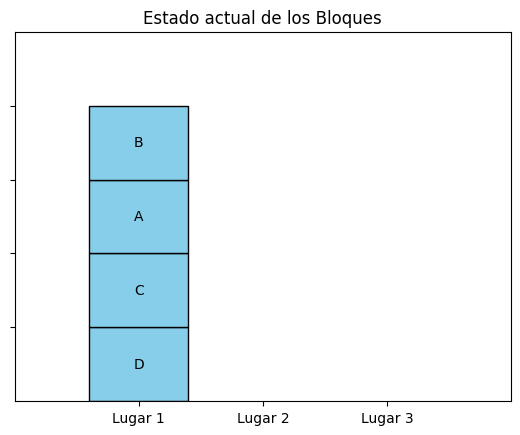

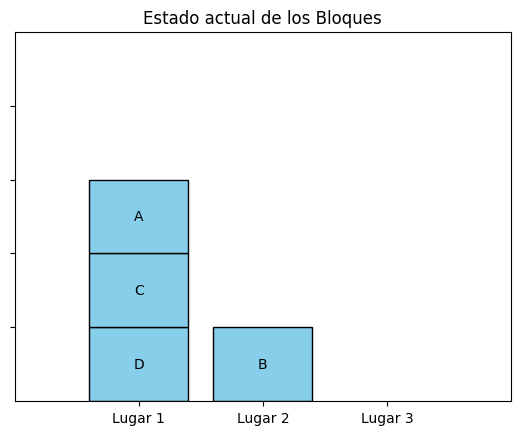

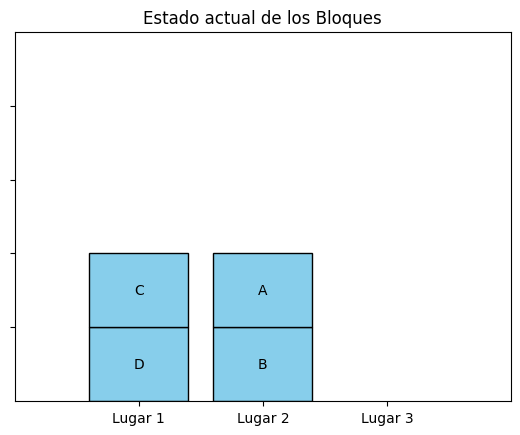

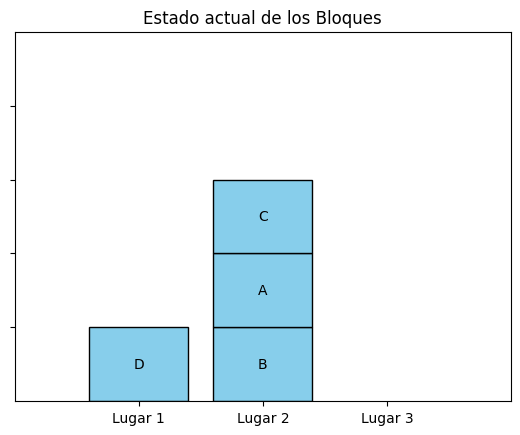

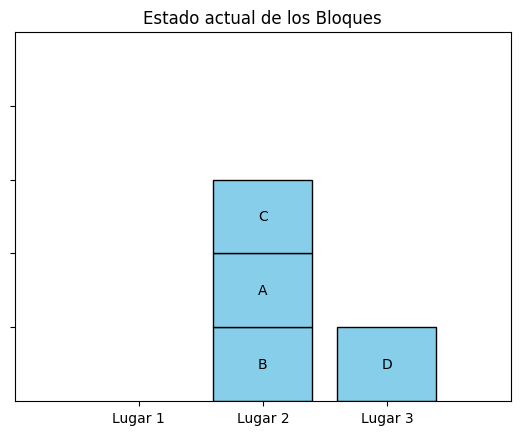

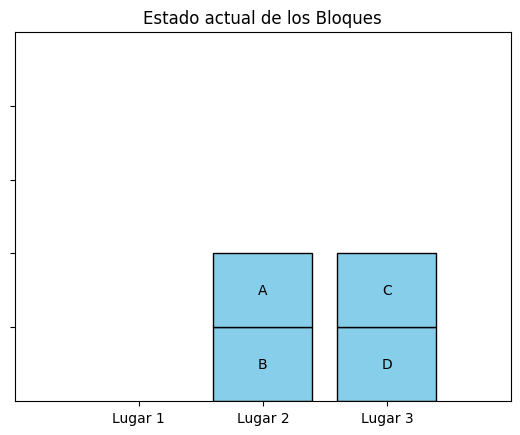

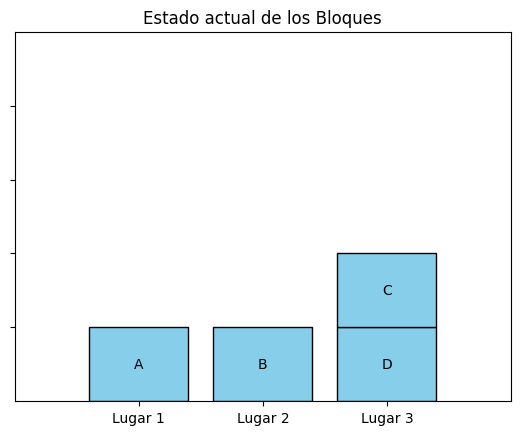

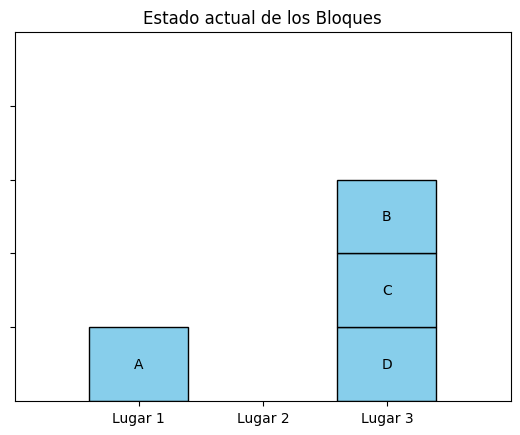

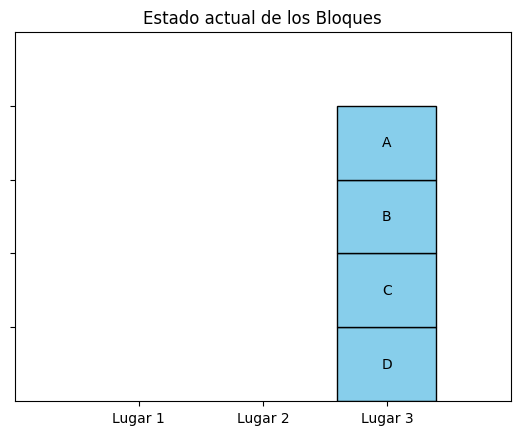

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import deque


class BlockWorld:
    def __init__(self):
        # Define el estado inicial y objetivo
        self.initial_state = {
            1: ['D', 'C', 'A', 'B'],  # Bloques en el lugar 1
            2: [],                    # Lugar 2 inicialmente vacío
            3: []                     # Lugar 3 inicialmente vacío
        }
        self.goal_state = {
            1: [],                   # Lugar 1 vacío
            2: [],                   # Lugar 2 vacío
            3: ['D', 'C', 'B', 'A']  # Bloques en el lugar 3
        }

    def is_goal_state(self, state):
        # Verifica si el estado actual es el estado objetivo
        return state == self.goal_state

    def possible_actions(self, state):
        # Devuelve una lista de acciones posibles dadas las restricciones
        actions = []
        # Considera cada ubicación
        for location in state:
            if state[location]:
                # Si hay bloques en la ubicación, solo el bloque superior se puede mover
                block_to_move = state[location][-1]
                # Verifica a qué otras ubicaciones se puede mover el bloque
                for target_location in state:
                    if target_location != location:
                        actions.append(('MOVE', block_to_move, location, target_location))
        # print(actions) #Descomenta esto para ver las acciones posibles
        return actions

    def transition(self, state, action):
        # Devuelve el nuevo estado después de realizar una acción
        # Crea una copia del estado para modificar
        new_state = {location: blocks.copy() for location, blocks in state.items()}

        # Desempaqueta la acción
        action_type, block, from_location, to_location = action

        if action_type == 'MOVE':
            # Remueve el bloque de su ubicación actual
            new_state[from_location].remove(block)
            # Añade el bloque a la nueva ubicación
            new_state[to_location].append(block)

        return new_state

    def solve(self):
        # Implementa la lógica para resolver el problema (p.ej., búsqueda en amplitud o profundidad)
        # Inicializa la cola con el estado inicial
        queue = deque([{'state': self.initial_state, 'path': []}])

        while queue:
            current_node = queue.popleft()
            current_state = current_node['state']
            current_path = current_node['path']

            # Verifica si el estado actual es el estado objetivo
            if self.is_goal_state(current_state):
                return current_path

            # Expande los nodos sucesores
            for action in self.possible_actions(current_state):
                new_state = self.transition(current_state, action)
                new_path = current_path + [action]
                queue.append({'state': new_state, 'path': new_path})

        # Retorna None si no se encuentra una solución
        return None

    def display_state(self, state):
      # Función para visualizar el estado
      fig, ax = plt.subplots()
      ax.set_xlim([0, 4])
      ax.set_ylim([0, 5])
      ax.set_xticks([1, 2, 3])
      ax.set_yticks(range(1, 5))
      ax.set_xticklabels(['Lugar 1', 'Lugar 2', 'Lugar 3'])
      ax.set_yticklabels([])

      for location in state:
          blocks = state[location]
          for i, block in enumerate(blocks):
              rect = patches.Rectangle((location - 0.4, i), 0.8, 1, edgecolor='black', facecolor='skyblue')
              ax.add_patch(rect)
              plt.text(location, i + 0.5, block, ha='center', va='center')

      plt.title("Estado actual de los Bloques")
      plt.show()


def main():
    # Crear una instancia del mundo de bloques
    block_world = BlockWorld()

    # Resolver el problema
    solution = block_world.solve()

    # Reconstruir los estados a partir de las acciones
    if solution is not None:
        num_movements = len(solution)
        print(f"Número de movimientos para resolver: {num_movements}")

        current_state = block_world.initial_state
        block_world.display_state(current_state)  # Visualizar el estado inicial
        for action in solution:
            current_state = block_world.transition(current_state, action)
            block_world.display_state(current_state)  # Visualizar el estado después de cada acción
    else:
        print("No se encontró una solución.")


if __name__ == "__main__":
    main()
